In [ ]:
from google.colab import auth
import pandas as pd
auth.authenticate_user()
query = "SELECT * FROM team-elec.Merge_Projet.Projet_Elec_2013_2023_cleaned"
elec_df = pd.read_gbq(query, project_id = "team-elec")

In [ ]:
elec_df.head()

,date_date,Population_M,Production_totale_brute_GW,Production_totale_nette_GW,Prod_nucl_brute_GW,Prod_nucl_nette_GW,Prod_hydro_brute_GW,Prod_hydro_nette_GW,Prod_eol_brute_GW,Prod_eol_nette_GW,...,Conso_totale_GW,Conso_therm_GW,Conso_nucl_GW,Conso_eol_GW,Conso_sol_GW,Conso_hydro_GW,Conso_bioener_GW,Prix_moyen_ttes_tranches_E100kWh,Prix_moyen_tranche_A_E100kWh,Prix_moyen_tranche_B_E100kWh
0,2015-01-01,66458153,568046.99,544176.78,437428.23,416797.12,59327.13,58600.48,20166.79,20166.79,...,472381.814,46796.040,397492.919,22355.466,3702.771,52621.425,7205.595,16.25,28.58,18.75
1,2019-01-01,67290471,567455.41,543733.09,399011.59,379463.75,61634.04,60879.14,34307.33,34307.33,...,472637.349,50058.334,354856.217,36711.503,6465.363,59945.426,8467.131,17.79,36.32,21.52
2,2023-01-01,68172977,520219.28,498928.96,338202.28,320412.00,60466.11,59725.51,50817.82,50817.82,...,93218.147,9195.565,61391.413,11270.894,1208.902,12512.599,1764.492,23.76,47.36,29.19
3,2016-01-01,66638391,552720.79,529482.89,403209.49,384020.95,64347.35,63559.22,19884.48,19884.48,...,466371.765,52204.667,361179.669,23189.682,4024.624,53923.753,7566.096,16.49,28.83,18.76
4,2017-01-01,66809816,550354.66,526642.91,398355.91,379090.90,53902.00,53241.81,22595.05,22595.05,...,471375.832,63418.861,344925.312,25692.980,4102.416,48154.060,7973.869,16.64,31.06,19.77


In [ ]:
elec_df.columns.values

array(['date_date', 'Population_M', 'Production_totale_brute_GW',
       'Production_totale_nette_GW', 'Prod_nucl_brute_GW',
       'Prod_nucl_nette_GW', 'Prod_hydro_brute_GW', 'Prod_hydro_nette_GW',
       'Prod_eol_brute_GW', 'Prod_eol_nette_GW', 'Prod_sol_brute_GW',
       'Prod_sol_nette_GW', 'Prod_therm_brute_GW', 'Prod_therm_nette_GW',
       'Import_total_GW', 'Export_total_GW', 'Conso_totale_GW',
       'Conso_therm_GW', 'Conso_nucl_GW', 'Conso_eol_GW', 'Conso_sol_GW',
       'Conso_hydro_GW', 'Conso_bioener_GW',
       'Prix_moyen_ttes_tranches_E100kWh', 'Prix_moyen_tranche_A_E100kWh',
       'Prix_moyen_tranche_B_E100kWh'], dtype=object)

In [ ]:
elec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date_date                         11 non-null     dbdate 
 1   Population_M                      11 non-null     Int64  
 2   Production_totale_brute_GW        11 non-null     float64
 3   Production_totale_nette_GW        11 non-null     float64
 4   Prod_nucl_brute_GW                11 non-null     float64
 5   Prod_nucl_nette_GW                11 non-null     float64
 6   Prod_hydro_brute_GW               11 non-null     float64
 7   Prod_hydro_nette_GW               11 non-null     float64
 8   Prod_eol_brute_GW                 11 non-null     float64
 9   Prod_eol_nette_GW                 11 non-null     float64
 10  Prod_sol_brute_GW                 11 non-null     float64
 11  Prod_sol_nette_GW                 11 non-null     float64
 12  Prod_therm

In [ ]:
import numpy as np
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
elec_df['date_date'] = pd.to_datetime(elec_df['date_date'])

elec_df['date_year'] = elec_df['date_date'].dt.year


<Axes: >

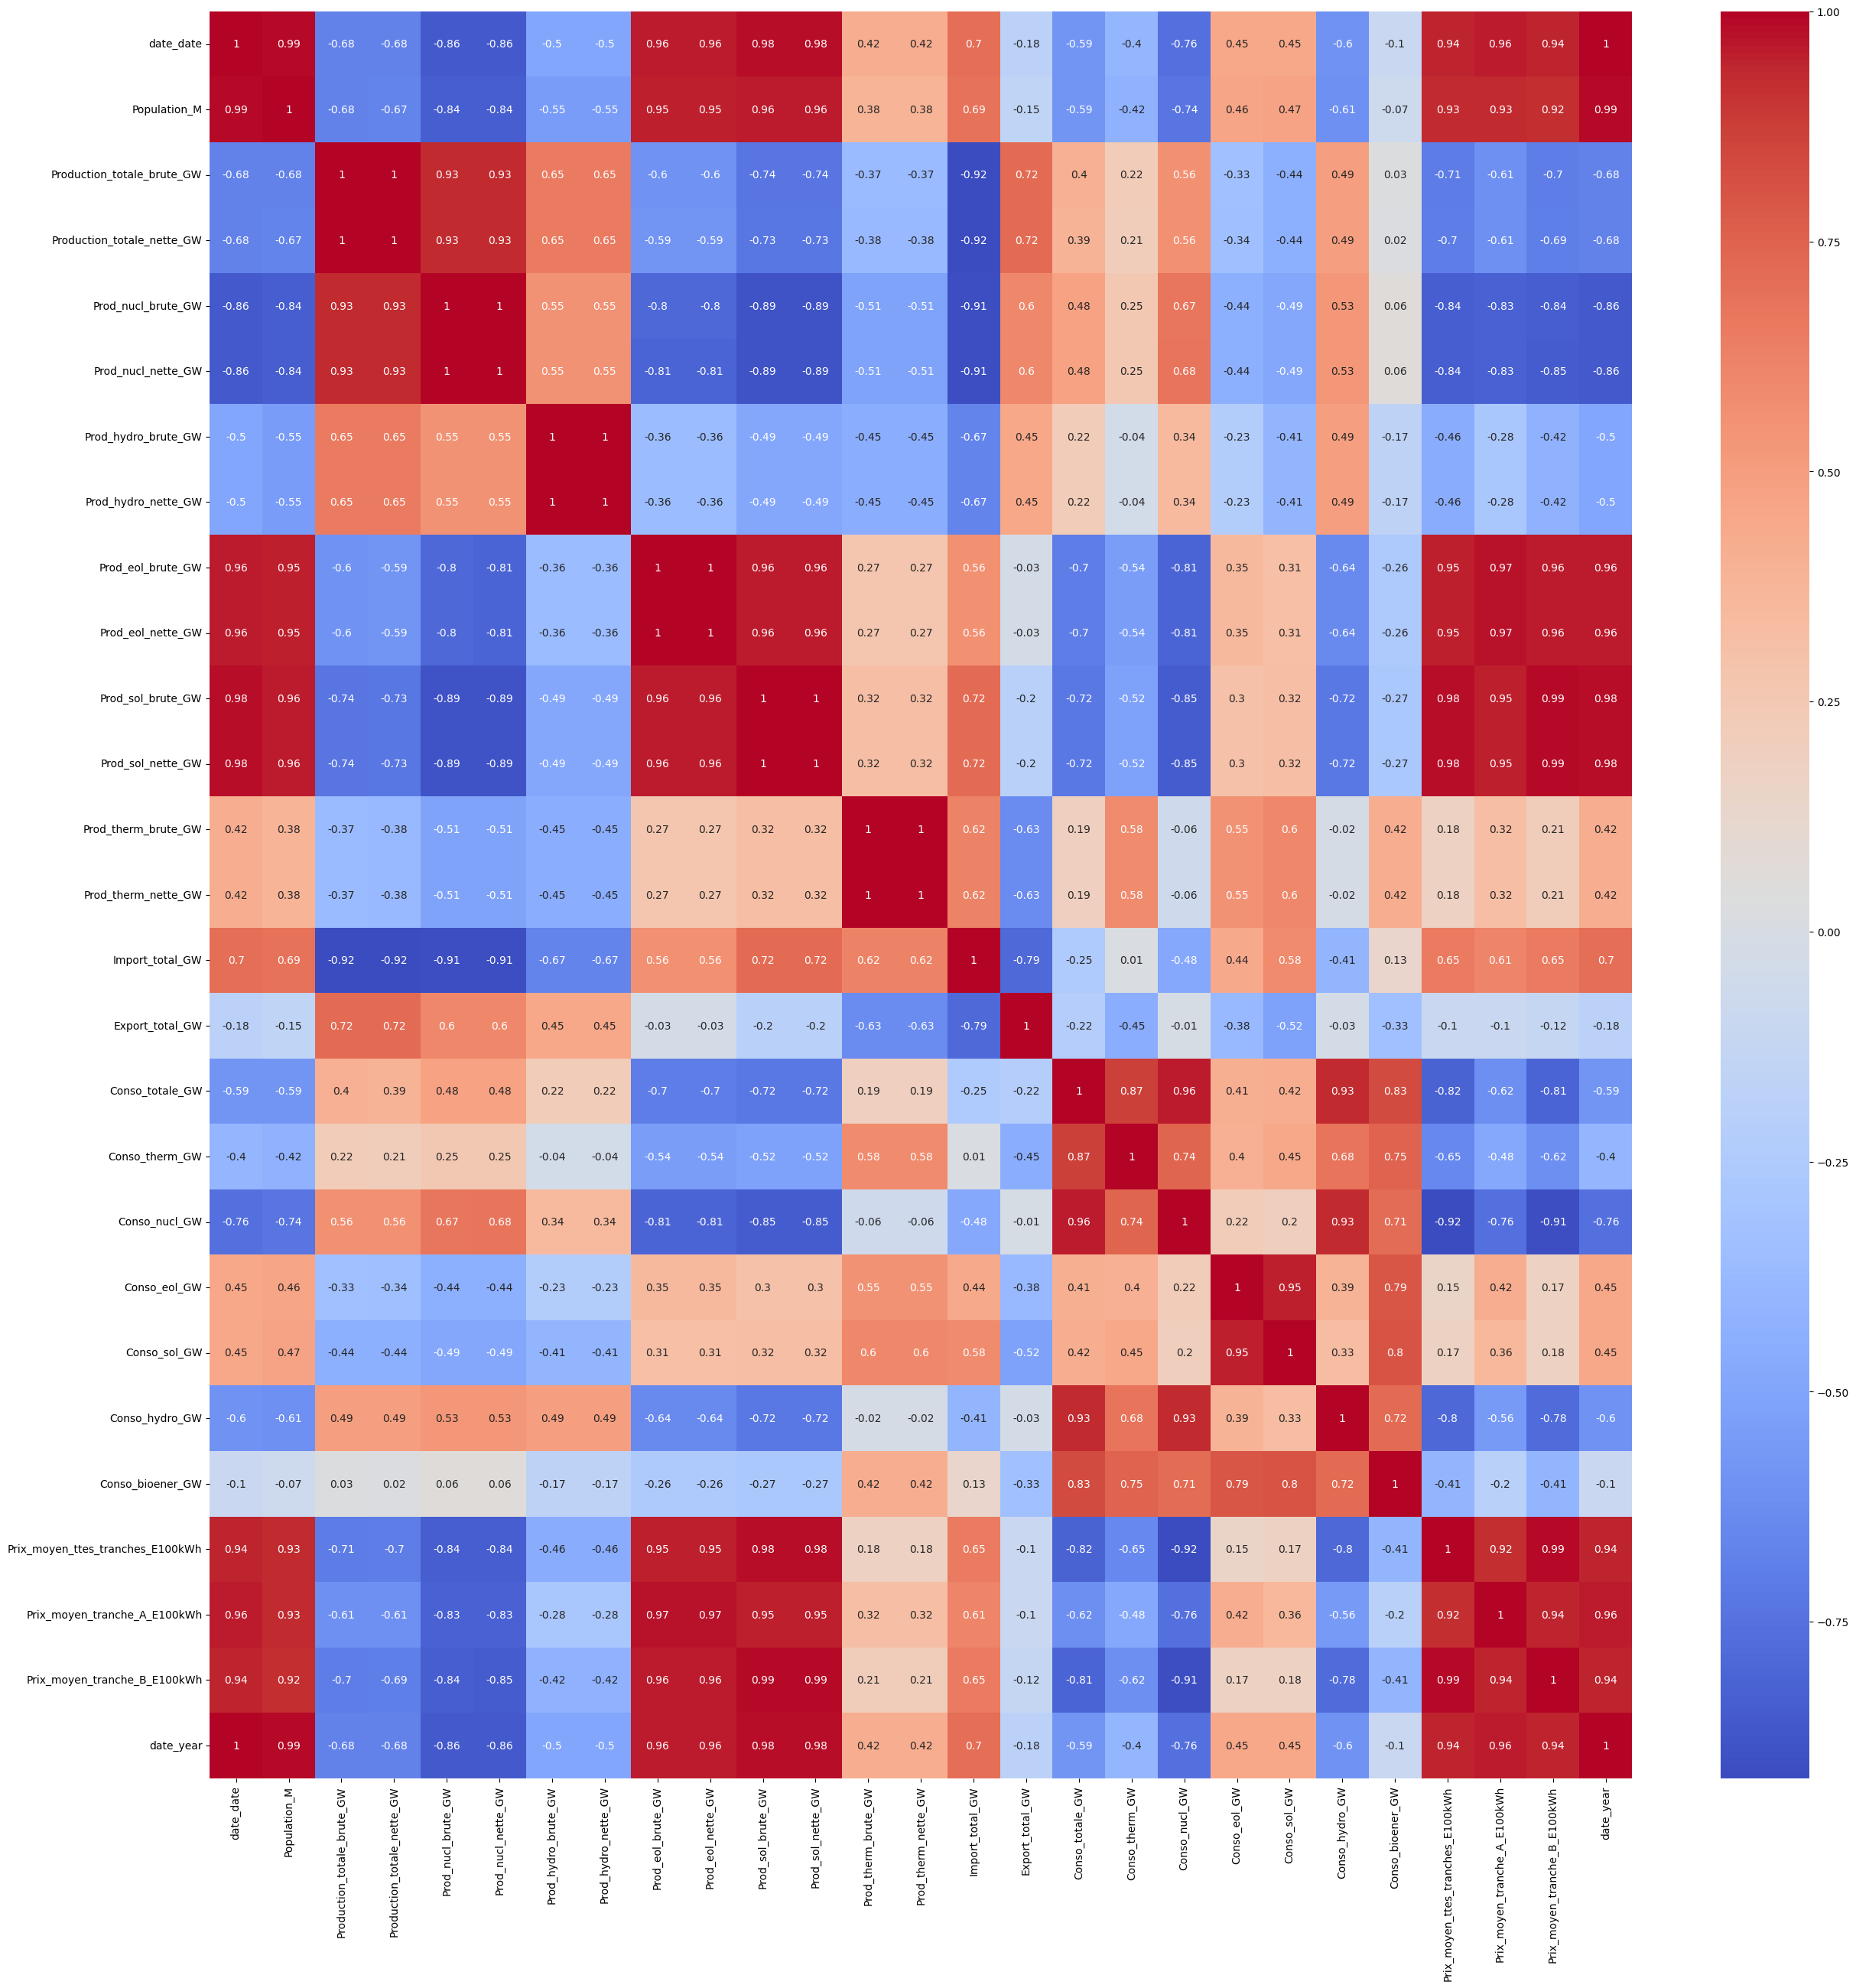

In [ ]:
correlation_matrix = elec_df.corr().round(2)
fig, ax = plt.subplots(figsize=(30,30))         # Sample figsize in inches
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')

In [ ]:
X = elec_df[["Population_M", "Production_totale_nette_GW", "Prod_nucl_nette_GW", "Prod_hydro_nette_GW", "Prod_eol_nette_GW", "Prod_sol_nette_GW", "Conso_totale_GW"]]
y = elec_df["Prix_moyen_ttes_tranches_E100kWh"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8, 7), (3, 7), (8,), (3,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
score = lin_reg.score(X_test_scaled, y_test)
print(score)

-3.785404926857936


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg= LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

ValueError: Unknown label type: 'continuous'